In [1]:
import os
import requests
import shutil
from astropy.io import fits
import numpy as np
import matplotlib.pyplot as plt
import sys
plt.style.use('../../Code/jin_test.mplstyle')
sys.path.append('../../Code/py_astro_gxjin')
import manga
import flux

findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Myriad Pro SemiExt'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Myriad Pro'] not found. Falling back to DejaVu Sans.


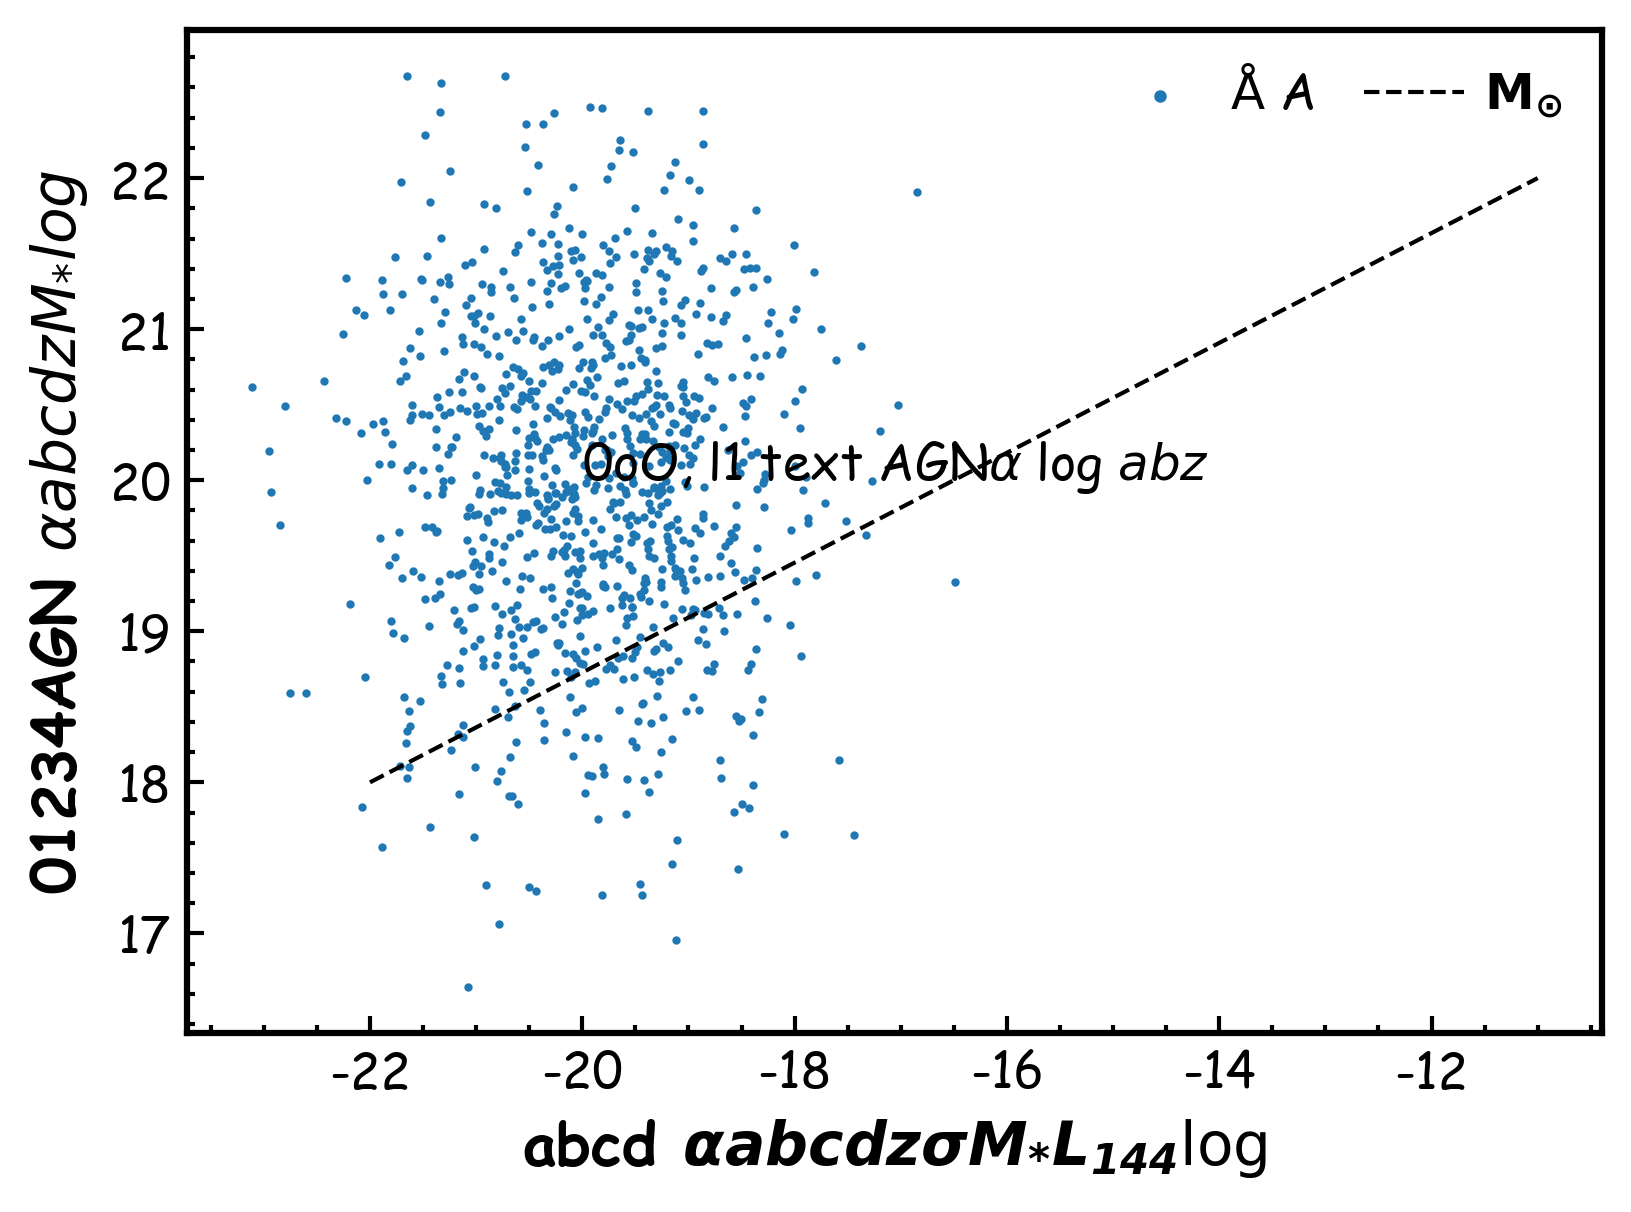

In [2]:
plt.scatter(np.random.normal(-20, size=1000), np.random.normal(20, size=1000), s=1, label=r'$\rm \AA$ A')
plt.plot([-22,-11],[18,22],'k--', label=r'$ \bf M_{\odot}$')
plt.xlabel(r'abcd $\bfit \alpha abcdz \sigma M_{*} L_{144} \rm log$')
plt.ylabel(r'01234AGN $\alpha abcdz M_{*}  log$')
plt.text(-20,20,r'0oO, l1 text AGN$\alpha$ log $abz$')
plt.legend(ncols=2)

In [5]:
def measure_ew(spec,):
    
    elpbew1 = dict(zip(['OII-3727D', 'Hb-4862', 'OIII-5008', 'OI-6302', 'Ha-6564', 'NII-6585', 'SII-6718', 'SII-6732'], 
                       [3716.3,      4852.7,    4998.2,      6292.0,    6557.6,    6575.3,     6711.3,     6725.7,]))
    elpbew2 = dict(zip(['OII-3727D', 'Hb-4862', 'OIII-5008', 'OI-6302', 'Ha-6564', 'NII-6585', 'SII-6718', 'SII-6732'], 
                       [3738.3,      4872.7,    5018.2,      6312.0,    6571.6,    6595.3,     6725.3,     6739.7,]))
    elpbbl1 = dict(zip(['OII-3727D', 'Hb-4862', 'OIII-5008', 'OI-6302', 'Ha-6564', 'NII-6585', 'SII-6718', 'SII-6732'], 
                       [3706.3,      4798.9,    4978.2,      6272.0,    6483.0,    6483.0,     6690.0,     6690.0,]))
    elpbbl2 = dict(zip(['OII-3727D', 'Hb-4862', 'OIII-5008', 'OI-6302', 'Ha-6564', 'NII-6585', 'SII-6718', 'SII-6732'], 
                       [3716.3,      4838.9,    4998.2,      6292.0,    6513.0,    6513.0,     6708.0,     6708.0,]))
    elpbrd1 = dict(zip(['OII-3727D', 'Hb-4862', 'OIII-5008', 'OI-6302', 'Ha-6564', 'NII-6585', 'SII-6718', 'SII-6732'], 
                       [3738.6,      4885.6,    5028.2,      6312.0,    6623.0,    6623.0,     6748.0,     6748.0,]))
    elpbrd2 = dict(zip(['OII-3727D', 'Hb-4862', 'OIII-5008', 'OI-6302', 'Ha-6564', 'NII-6585', 'SII-6718', 'SII-6732'], 
                       [3748.6,      4925.6,    5048.2,      6332.0,    6653.0,    6653.0,     6768.0,     6768.0,]))
    
    ews = dict.fromkeys(['OII-3727D', 'Hb-4862', 'OIII-5008', 'OI-6302', 'Ha-6564', 'NII-6585', 'SII-6718', 'SII-6732'], np.nan)

{'OII-3727D': 0.0, 'Hb-4862': 0.0}

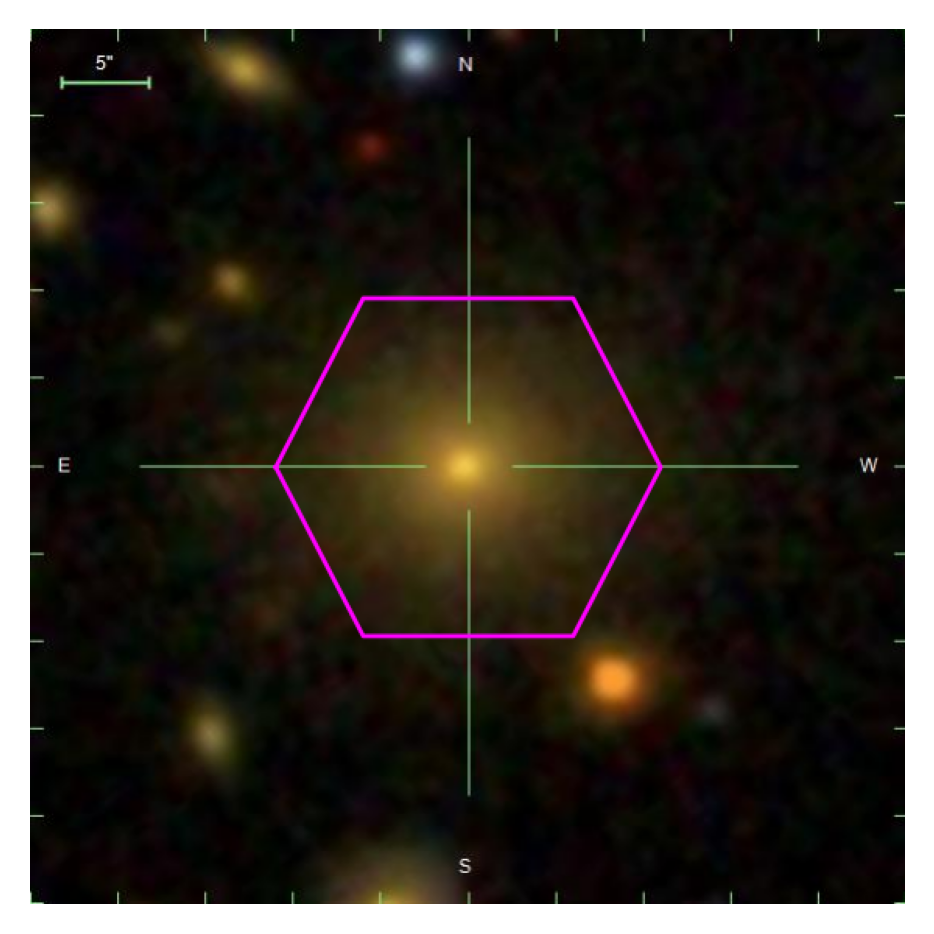

In [147]:
manga.plot_gri_image(8717, 6104)

In [7]:
hdutest = fits.open('../../LoTSS/empty_fields/jet/manga-8479-12704-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz')
hdutest.info()

Filename: ../../LoTSS/empty_fields/jet/manga-8479-12704-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     124   ()      
  1  FLUX          1 ImageHDU        45   (72, 72, 4563)   float32   
  2  IVAR          1 ImageHDU        46   (72, 72, 4563)   float32   
  3  MASK          1 ImageHDU        45   (72, 72, 4563)   int16   
  4  LSF           1 ImageHDU        44   (72, 72, 4563)   float32   
  5  WAVE          1 ImageHDU         9   (4563,)   float32   
  6  REDCORR       1 ImageHDU         9   (4563,)   float32   
  7  MODEL         1 ImageHDU        44   (72, 72, 4563)   float32   
  8  MODEL_MASK    1 ImageHDU        44   (72, 72, 4563)   int16   
  9  EMLINE        1 ImageHDU        43   (72, 72, 4563)   float32   
 10  STELLAR       1 ImageHDU        44   (72, 72, 4563)   float32   
 11  STELLAR_MASK    1 ImageHDU        44   (72, 72, 4563)   int16   
 12  BINID         1 ImageHDU        46  

In [ ]:
# Imports
import numpy
from astropy.io import fits
from matplotlib import pyplot

# This is a bitmask handling object from the DAP source code
# from mangadap.dapfits import DAPCubeBitMask

# Open the fits file
# hdu_maps = fits.open('manga-8138-12704-MAPS-SPX-MILESHC-MASTARSSP.fits.gz')
hdu_cube = fits.open('../../LoTSS/empty_fields/jet/manga-8479-12704-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz')

# Get the S/N per bin from the MAPS file
# snr = numpy.ma.MaskedArray(hdu_maps['BIN_SNR'].data, mask=hdu_maps['BINID'].data[0] < 0)

# Select the bin/spaxel with the highest S/N and get the relevant map coordiantes
# k = numpy.ma.argmax(snr.ravel())
# j, i = numpy.unravel_index(k, hdu_maps['BIN_SNR'].data.shape)
j=30
i=30


# Declare the bitmask object to mask selected pixels
# bm = DAPCubeBitMask()
wave = hdu_cube['WAVE'].data
flux = numpy.ma.MaskedArray(hdu_cube['FLUX'].data[:,j,i],
                            mask=hdu_cube['MASK'].data[:,j,i],)

# model = numpy.ma.MaskedArray(hdu_cube['MODEL'].data[:,j,i],
#                              mask=bm.flagged(hdu_cube['MODEL_MASK'].data[:,j,i], 'FITIGNORED'))
# stellarcontinuum = numpy.ma.MaskedArray(hdu_cube['MODEL'].data[:,j,i]
#                                             - hdu_cube['EMLINE'].data[:,j,i],
#                                         mask=hdu_cube['MODEL_MASK'].data[:,j,i],)
# emlines = numpy.ma.MaskedArray(hdu_cube['EMLINE'].data[:,j,i],
#                                mask=bm.flagged(hdu_cube['MODEL_MASK'].data[:,j,i], 'ELIGNORED'))
# resid = flux-model-0.5

skylinecut = (wave)


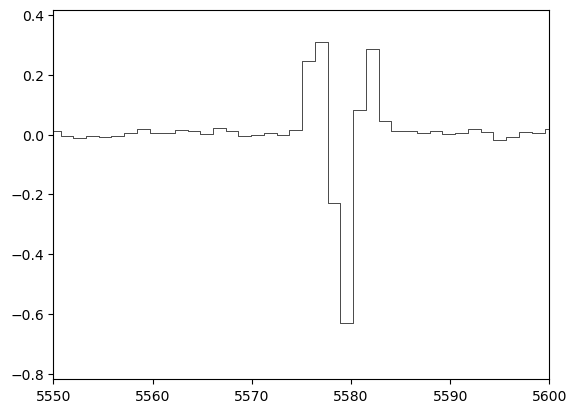

In [19]:
pyplot.step(wave, flux, where='mid', color='k', lw=0.5)
# pyplot.plot(wave, model, color='r', lw=1)
# pyplot.plot(wave, stellarcontinuum, color='g', lw=1)
# pyplot.plot(wave, emlines, color='b', lw=1)
# pyplot.step(wave, resid, where='mid', color='0.5', lw=0.5)
plt.xlim(5550,5600)
pyplot.show()

In [7]:
wave, flux, ferr, ngood = manga.stack_logcube('local', 'pasector', cubefile='d:/manga/data/manga-9507-9101-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz', mapsfile='d:/manga/data/manga-9507-9101-MAPS-SPX-MILESHC-MASTARSSP.fits.gz')

(0.0, 487.1646911621094)

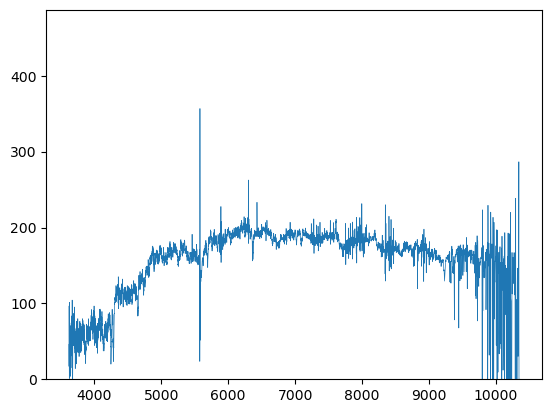

In [8]:
plt.plot(wave, flux, lw=0.5)
plt.ylim(0,)

In [23]:
hdutest = fits.open('d:/manga/data/manga-9507-6103-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz')
fluxtest = hdutest['FLUX'].data
ivartest = hdutest['IVAR'].data
masktest = hdutest['MASK'].data

fluxtest[masktest>0] = np.nan
cut = np.zeros((52,52), dtype=bool) | True

In [43]:
np.sqrt(-1)

C:\Users\schac\AppData\Local\Temp\ipykernel_4316\3438155168.py:1: RuntimeWarning: invalid value encountered in sqrt
  np.sqrt(-1)


nan

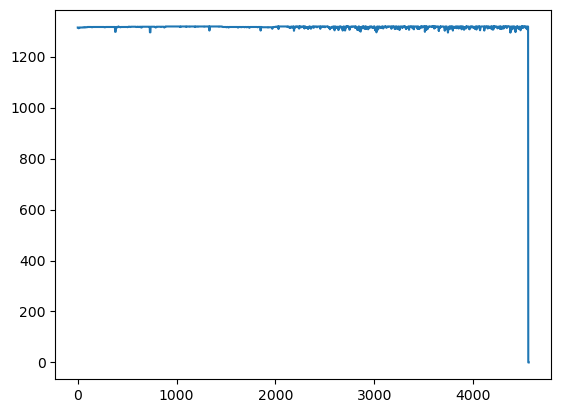

In [41]:
plt.plot(np.nansum(~np.isnan(fluxtest[:,cut]), axis=1))

In [34]:
fluxtest[:,cut][:,1].shape

(4563,)

In [25]:
test = np.nansum(fluxtest[:,cut],axis=0)
np.sum(np.isnan(test))

0

In [21]:
fluxtest[:, cut].shape

(4563, 2704)

In [4]:
save_dir='d:/asdasdasd'
daptype='SPX'

print(save_loc)

d:/asdasdasd/manga-10000-12701-LOGCUBE-SPX-MILESHC-MASTARSSP.fits.gz


In [3]:
f'{plate}/{ifudesign}/manga-{plate}'

'10000/12701'

In [4]:
int(2/2)

1